<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from itertools import combinations
from scipy.stats import pearsonr

In [2]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [3]:
breast_cancer = pd.read_csv(breast_cancer_csv)
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
breast_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# Drop id and unnamed:32
breast_cancer = breast_cancer.drop(['Unnamed: 32', 'id'], axis=1)
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
breast_cancer.shape

(569, 31)

In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

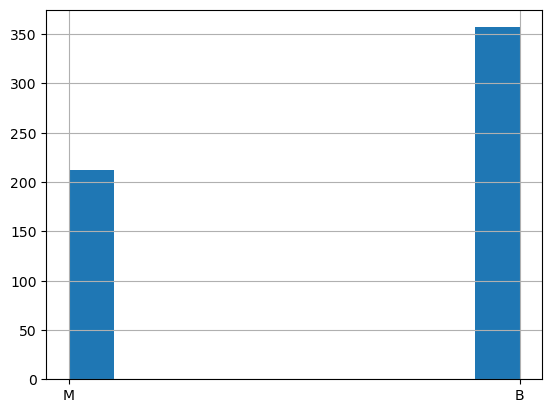

In [9]:
breast_cancer['diagnosis'].hist()

In [10]:
# change the target columns diagnosis to dummy value using map. 
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'B': 0, 'M': 1})
breast_cancer.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


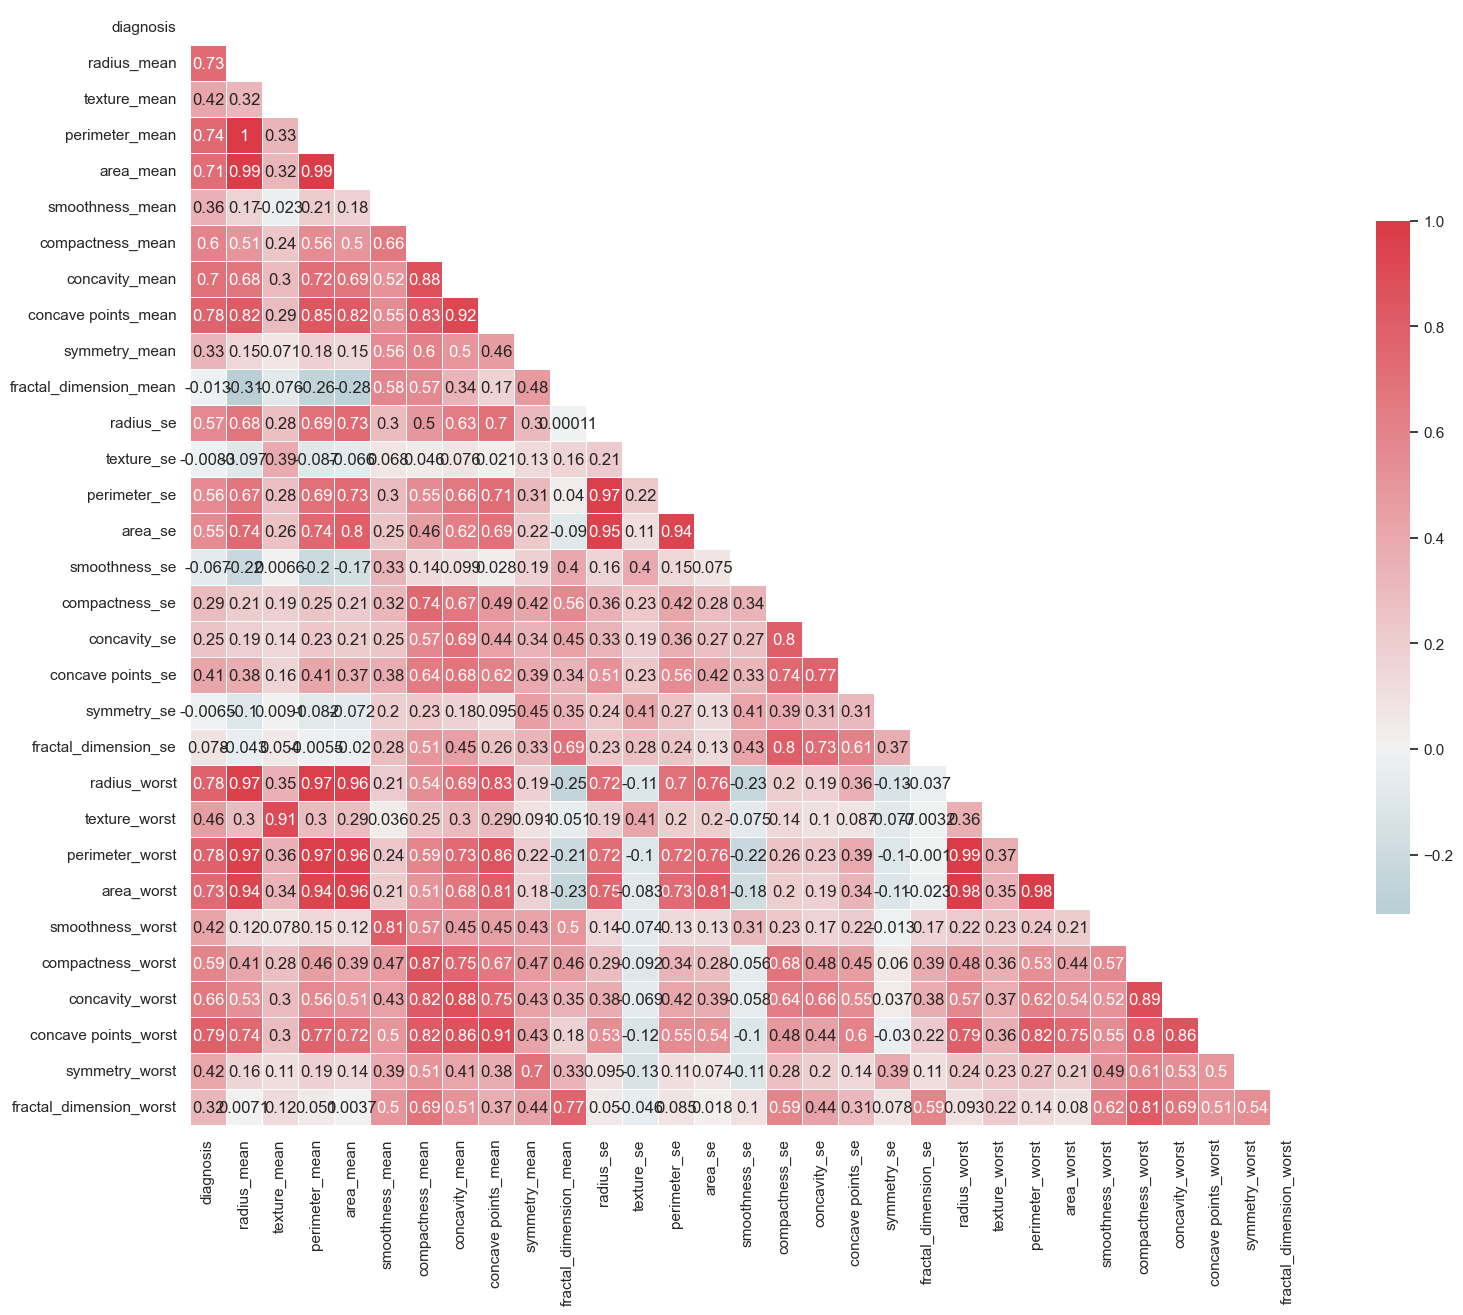

In [11]:
# from answers
sns.set(style='white')

mask = np.zeros_like(breast_cancer.corr(), dtype=np.bool_) ## shows everything
mask[np.triu_indices_from(mask)] = True # hide the upper half
# lower half, we use np.tril_indices_from

f, ax = plt.subplots(figsize=(18, 18))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmax=1, center=0, 
              square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)

# cbar: colorbar size is half of the heat map. 
# square=True, each number block is a quare, easier to read. 
# vmax: value max of heatmap set to 1 because of corr. 
plt.show()
# I tried clustermap wich could help to order the corr 
# but it doesn't work with the mask. 

#### I don't know why the answer is filtering the columns. 
for the sake of practicing i just try to understand and copy the code. 

In [12]:
mean_only_columns = []
for column in breast_cancer.columns:
    if '_mean' in column or 'diagnosis' in column:
        mean_only_columns.append(column)
print(mean_only_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [13]:
selected_breast_cancer = breast_cancer[mean_only_columns]
selected_breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


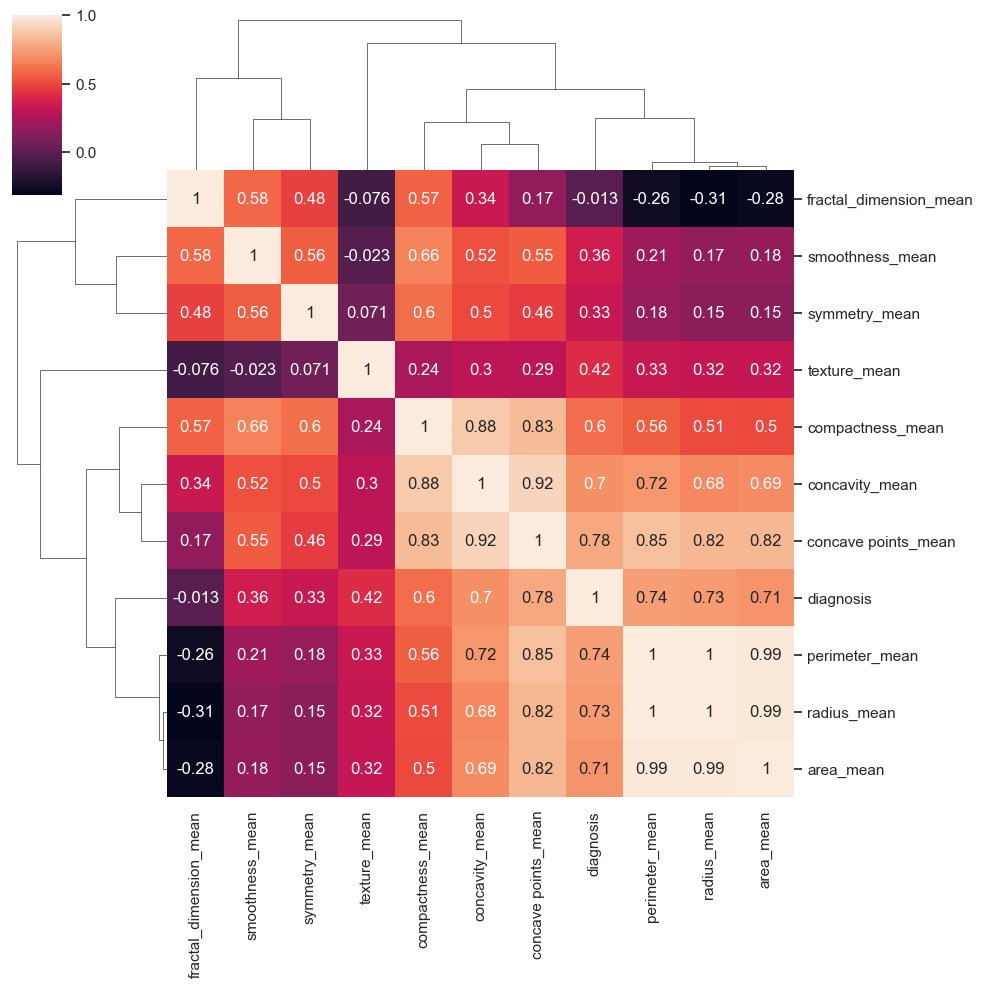

In [14]:
# 
sns.clustermap(selected_breast_cancer.corr(), annot=True)

#### what I learned from the function below. 
pearsonr() vs corr(): 

- pearsonr() returns a tuple with p-value and coefficient.
- corr() only return coefficient. 

- pearsonr only use between two datasets. 
- corr() can use in pairwise dataframe columns and return a dataframe of coefficient.

Combinations(): this will pair the list into every combination. 

In [15]:
from scipy.stats import pearsonr
from itertools import combinations
from scipy import stats
def find_feature_correlations(df):
    '''
    Fined correlations between df features and convert to a format
    with one feature1 vs feature2 correlation value per row

    _Params:_

    df: pandas DataFrame, features as columns. All datatypes must be numeric

    Returns a pandas DataFrame where a row contains one feature1 vs feature2 
    correlation value
    '''
    var1 = []
    var2 = []
    pearsons = []
    pvalues = []

    for comb in combinations(df.columns.tolist(), 2):
        v1 = comb[0]
        var1.append(v1)
        v2 = comb[1]
        var2.append(v2)

        p, p_value = stats.pearsonr(df[v1], df[v2])
        pearsons.append(p)
        pvalues.append(p_value)
    corr_df = pd.DataFrame({'Feature1': var1,
                           'Feature2': var2,
                           'p': pearsons, 
                           'p-value': pvalues})
    return corr_df

In [16]:
cancer_corr = find_feature_correlations(selected_breast_cancer)
cancer_corr[cancer_corr['p'] > 0.7].sort_values(by='p')
# if the data is too complicated to read, we can alwasy exclude diagnosis and see
# selected_breast_cancer.drop('diagnosis', axis=1)

,Feature1,Feature2,p,p-value
3,diagnosis,area_mean,0.708984,4.734564e-88
30,perimeter_mean,concavity_mean,0.716136,1.322967e-90
0,diagnosis,radius_mean,0.730029,8.465941e-96
2,diagnosis,perimeter_mean,0.742636,8.436251e-101
7,diagnosis,concave points_mean,0.776614,7.101150e-116
16,radius_mean,concave points_mean,0.822529,4.350747e-141
37,area_mean,concave points_mean,0.823269,1.491019e-141
46,compactness_mean,concave points_mean,0.831135,1.240590e-146
31,perimeter_mean,concave points_mean,0.850977,1.047656e-160
45,compactness_mean,concavity_mean,0.883121,1.623002e-188


#### what i leaned - the reason they exclude these columns
we can see the above seven columns are highly related to each other.
as we assume all features we fit into models are not related so the model can be more stable. 
so we can only choose one or two from the six columns apart from the target column.
concave and points_mean gives the highest correlation with diagnosis, i guess that is why the answer sheet is try to choose these two. 
there is also a typo in answer sheet 'compact_points_mean', which should be 'compactness_mean'

In [17]:
# I didn't know why the answer just pick all the mean data. 
# So i try to pass the whole data frame to the function. 
cancer_corr_w = find_feature_correlations(breast_cancer)
cancer_corr_w[cancer_corr_w['p'] > 0.90].sort_values(by='p')
# it makes sense if we only select mean. 
# but i wish the answer sheet has some explanation about it. 
# cause mean is the most common aggregation data while se and worst 
# cannot represent the data. 
# and also related to the mean.
#so we cannot have all the data for prediction. 

,Feature1,Feature2,p,p-value
231,concave points_mean,concave points_worst,0.910155,3.662252e-219
78,texture_mean,texture_worst,0.912045,1.169260e-221
189,concavity_mean,concave points_mean,0.921391,6.788791e-235
312,perimeter_se,area_se,0.937655,2.094921e-262
52,radius_mean,area_worst,0.941082,3.767447e-269
107,perimeter_mean,area_worst,0.941550,4.216389e-270
277,radius_se,area_se,0.951830,2.841332e-293
132,area_mean,perimeter_worst,0.959120,5.092299e-313
133,area_mean,area_worst,0.959213,2.692041e-313
130,area_mean,radius_worst,0.962746,0.000000e+00


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [18]:
# ANSWER 2
breast_cancer['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

### 4. What is the baseline accuracy?

In [19]:
# ANSWER
#the most frequency class is the baseline. in this case is 62.74%. 

### 5. Choose features to be your predictor variables and set up your X.

In [20]:
# ANSWER
# from the answersheet, it is not nice to keep people guessing 
# why the answer is choosen the columns the way it is. see the above explanation
feature_columns = []
excluded_columns = ['diagnosis', 'area_mean', 'radius_mean', 
                   'concavity_mean', 'compactness_mean']
for column in selected_breast_cancer.columns: 
    if column not in excluded_columns:
        feature_columns.append(column)

X = selected_breast_cancer[feature_columns]
X.head()



,texture_mean,perimeter_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,10.38,122.80,0.11840,0.14710,0.2419,0.07871
1,17.77,132.90,0.08474,0.07017,0.1812,0.05667
2,21.25,130.00,0.10960,0.12790,0.2069,0.05999
3,20.38,77.58,0.14250,0.10520,0.2597,0.09744
4,14.34,135.10,0.10030,0.10430,0.1809,0.05883


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [21]:
y = selected_breast_cancer['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [22]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor

# fit on the unstandardized data:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)



KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline? yes, theh accuracy is 1
- Is it legitimate? nope, cause the neighbor is only one. so the label is just the y label. 

In [23]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

from sklearn import metrics
print(metrics.accuracy_score(y, y_pred_class))


1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [24]:
from sklearn.model_selection import train_test_split

# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9385964912280702


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [25]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
k = X_train.shape[0]

# Fit Train Data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

# Print accuracy_score

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [31]:
# ANSWER
# plot test accuracy by number of neighbors:

test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))
test_acc[:5]

[0.9385964912280702,
 0.9210526315789473,
 0.9298245614035088,
 0.956140350877193,
 0.9122807017543859]

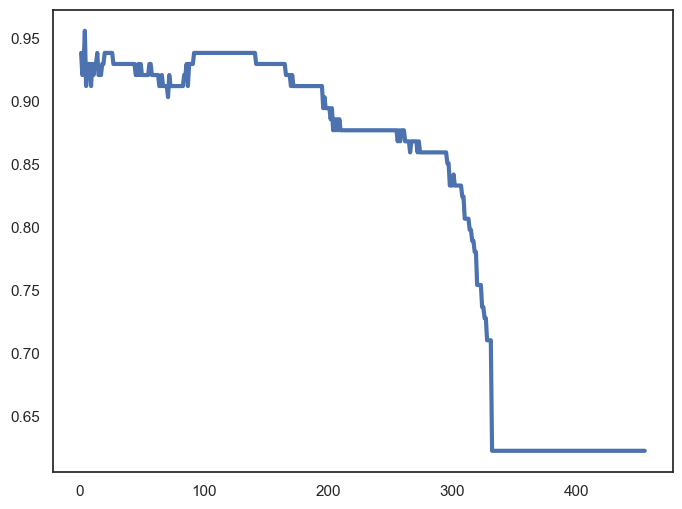

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [38]:
# ANSWER
# The np.floor function rounds down to the nearest whole number. 
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)
print(max_neighbors)

test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))
print(max(test_acc))


455.0
0.9068622884645242


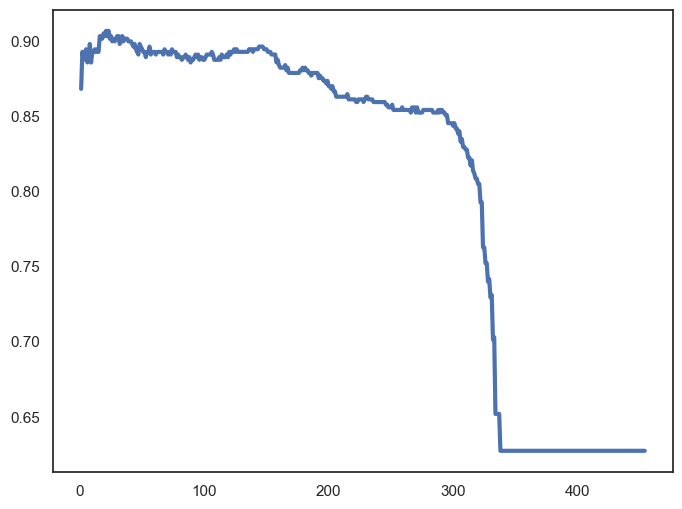

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better? - standardized accuracy is better
- Why? - number are compare at the same level. 

In [41]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn=KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

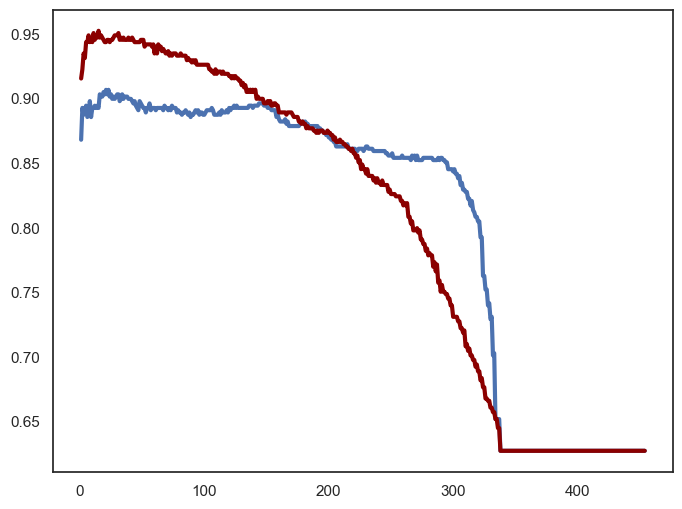

In [45]:
# ANSWER
# plot test accuracy by number of neighbors:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



